<a href="https://colab.research.google.com/github/asdfasdf0311/2023DataminingStudy/blob/main/ydms_week4_classification_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **YDMS 4주차 classification 설명모형_로지스틱회귀** - 주하연

데이터불러오기

In [ ]:
from google.colab import drive #구글 드라이브에 데이터를 저장해서 데이터를 불러왔다.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [ ]:
dat = pd.read_csv('/content/drive/MyDrive/ydms/dataset/framingham.csv')

결측치 처리 - 평균값 이용(수치형 자료)

결측치 처리 - 결측치 제거(범주형 자료)

In [ ]:
#결측치가 있는 값들을 평균으로 대체
dat['cigsPerDay'] = dat['cigsPerDay'].fillna(dat['cigsPerDay'].mean())
dat['totChol'] = dat['totChol'].fillna(dat['totChol'].mean())
dat['BMI'] = dat['BMI'].fillna(dat['BMI'].mean())
dat['heartRate'] = dat['heartRate'].fillna(dat['heartRate'].mean())
dat['glucose'] = dat['glucose'].fillna(dat['glucose'].mean())

In [ ]:
#범주형 자료는 결측치가 있는 행을을 제거
dat = dat.dropna(subset=['education','BPMeds'])
dat

,Sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,male,39,4.0,No,0.0,0.0,0,0,No,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,female,46,2.0,No,0.0,0.0,0,0,No,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,male,48,1.0,Yes,20.0,0.0,0,0,No,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,female,61,3.0,Yes,30.0,0.0,0,1,No,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,female,46,3.0,Yes,23.0,0.0,0,0,No,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4234,male,51,3.0,Yes,43.0,0.0,0,0,No,207.0,126.5,80.0,19.71,65.0,68.000000,0
4236,female,44,1.0,Yes,15.0,0.0,0,0,No,210.0,126.5,87.0,19.16,86.0,81.963655,0
4237,female,52,2.0,No,0.0,0.0,0,0,No,269.0,133.5,83.0,21.47,80.0,107.000000,0
4238,male,40,3.0,No,0.0,0.0,0,1,No,185.0,141.0,98.0,25.60,67.0,72.000000,0


In [ ]:
null_data=dat.isnull().sum().to_frame('null_count') #모든 결측치가 정제되었음을 볼 수 있다.
null_data

,null_count
Sex,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


In [ ]:
df = pd.DataFrame(dat) #dataframe으로 변환

In [ ]:
df

,Sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,male,39,4.0,No,0.0,0.0,0,0,No,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,female,46,2.0,No,0.0,0.0,0,0,No,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,male,48,1.0,Yes,20.0,0.0,0,0,No,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,female,61,3.0,Yes,30.0,0.0,0,1,No,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,female,46,3.0,Yes,23.0,0.0,0,0,No,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4234,male,51,3.0,Yes,43.0,0.0,0,0,No,207.0,126.5,80.0,19.71,65.0,68.000000,0
4236,female,44,1.0,Yes,15.0,0.0,0,0,No,210.0,126.5,87.0,19.16,86.0,81.963655,0
4237,female,52,2.0,No,0.0,0.0,0,0,No,269.0,133.5,83.0,21.47,80.0,107.000000,0
4238,male,40,3.0,No,0.0,0.0,0,1,No,185.0,141.0,98.0,25.60,67.0,72.000000,0


문자열을 숫자로 변환

In [ ]:
df['Sex'] = df['Sex'].map({'female':1,'male':0})
df['currentSmoker'] = df['currentSmoker'].map({'Yes':1,'No':0})
df['diabetes'] = df['diabetes'].map({'Yes':1,'No':0})

In [ ]:
df

,Sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,1,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,0,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,1,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,1,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4234,0,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.000000,0
4236,1,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,81.963655,0
4237,1,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.000000,0
4238,0,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.000000,0


"TenYearCHD"라는 변수가 10년 후 관상동맥 질환 발병 여부를 나타내는 변수이다. 이를 종속 변수로 설정하도록 하겠다. 

In [ ]:
X = df.drop('TenYearCHD', axis=1) #종속변수를 제외한 나머지 독립변수들
y = df.loc[:,['TenYearCHD']] #종속변수

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

데이터를 학습 데이터와 테스트 데이터로 분할

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

로지스틱 회귀 모델 학습

In [ ]:
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=5000)

테스트 데이터에 대한 예측



In [ ]:
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


성능

Confusion Matrix:
[[683   3]
 [123   8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       686
           1       0.73      0.06      0.11       131

    accuracy                           0.85       817
   macro avg       0.79      0.53      0.51       817
weighted avg       0.83      0.85      0.79       817



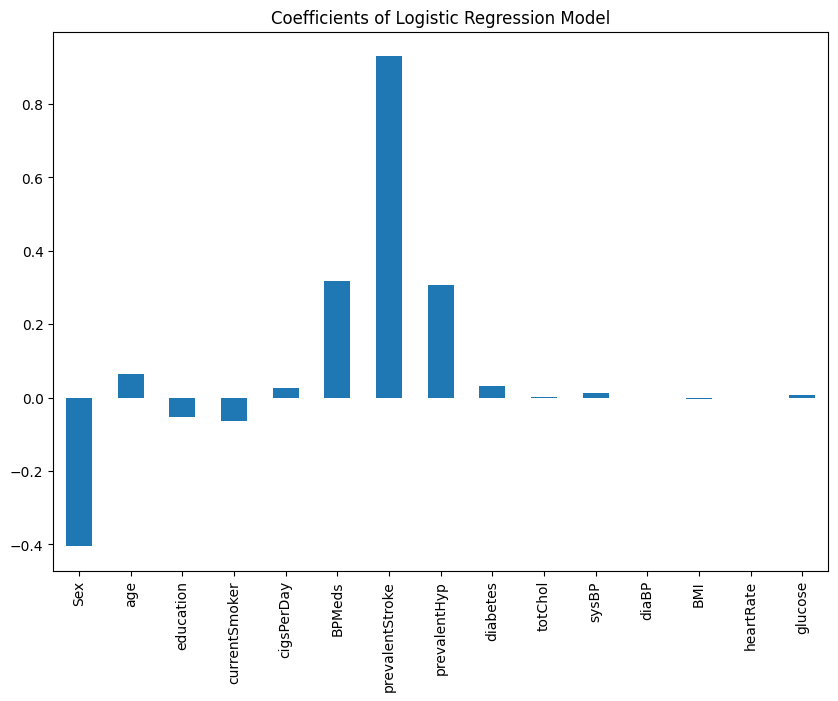

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

# 각 feature의 계수(coefficients)를 시각화
plt.figure(figsize=(10, 7))
coef = pd.Series(logreg.coef_[0], index = X_train.columns)
coef.plot(kind='bar')
plt.title('Coefficients of Logistic Regression Model')
plt.show()

In [ ]:
print(logreg.coef_) #각 Feature들의 계수(Coefficients)를 수치형으로 확인

[[-4.04674813e-01  6.47631049e-02 -5.28626456e-02 -6.29202814e-02
   2.50517067e-02  3.17380140e-01  9.30875456e-01  3.05449490e-01
   3.18225290e-02  6.77057438e-04  1.23198834e-02 -1.90249660e-03
  -3.50875102e-03 -1.71956009e-03  7.08742793e-03]]


위의 그래프와 수치형으로 확인한 계수들을 통해 어떤 Feature가 10년 후 관상동맥 질환 발병에 영향을 주는지 확인해 볼 수 있다.
그러나 수치가 정규화가 되어있지 않으므로 알아보기 어렵다.

정규화 진행

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
model = LogisticRegression()  
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
print(model.coef_)

[[-0.19798543  0.55711192 -0.05154477 -0.03436974  0.30360716  0.05344033
   0.08007689  0.14545724  0.00724242  0.03255273  0.26654094 -0.01802343
  -0.010949   -0.01646122  0.16175246]]


이제 한눈에 보기가 쉬워졌다. 이 수치로 어떠한 변수가 10년 후 관상동맥 질환 발병에 영향을 주는지 확인할 수 있다.

테스트 데이터에 대한 실제값과 예측값을 비교하는 ROC커브 그리기

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


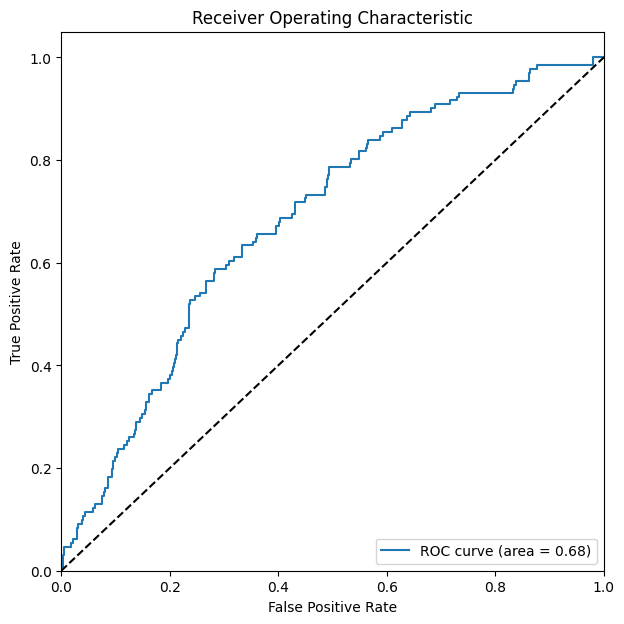

In [ ]:
# 확률 예측값을 계산
y_pred_prob = logreg.predict_proba(X_test)[:,1]


from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


직선일수록 좋지 않은 성능을 가지는데 여기선 곡선의 모습을 보여준다.